# Advance Topics in Python

## **1.** File Handling in Python

### **1.1** Some Theory

##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### **1.2** How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

### **1.3** Writing to a file

In [ ]:
# case 1 - if the file is not present
f = open('sample.txt','w')
f.write('Hello world')
f.close()
# since file is closed hence this will not work
# f.write('hello')

In [ ]:
# write multiline strings
f = open('sample.txt','w')
f.write('hello world')
f.write('\nhow are you?')
f.close()

In [ ]:
# case 2 - if the file is already present
f = open('sample.txt','w')
f.write('salman khan')
f.close()

In [ ]:
# how exactly open() works?

In [ ]:
# Problem with w mode
# introducing append mode
f = open('/content/sample.txt','a')
f.write('\nI am fine')
f.close()

In [ ]:
# write lines
L = ['hello\n','hi\n','how are you\n','I am fine']

f = open('/content/sample.txt','a')
f.writelines(L)
f.close()

In [ ]:
# reading from files
# -> using read()
f = open('/content/sample.txt','r')
s = f.read()
print(s)
f.close()

In [ ]:
# reading upto n chars
f = open('/content/sample.txt','r')
s = f.read(11)
print(s)
f.close()

In [ ]:
# readline() -> to read line by line
f = open('/content/sample.txt','r')
print(f.readline(),end='')
print(f.readline(),end='')
f.close()

In [ ]:
# reading entire using readline
f = open('/content/sample.txt','r')

while True:

  data = f.readline()

  if data == '':
    break
  else:
    print(data,end='')

f.close()

### **1.4** Using Context Manager (With)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

In [ ]:
# with
with open('/content/sample.txt','a') as f:
  f.write('Inam Ul Hassan')

In [ ]:
f.write('hello')

In [ ]:
# try f.read() now
with open('/content/sample.txt','r') as f:
  print(f.read())

In [ ]:
# moving within a file -> 10 char then 10 char
with open('sample.txt','r') as f:
  print(f.read(11))
  print(f.read(11))
  print(f.read(11))
  print(f.read(11))

In [ ]:
# benefit? -> to load a big file in memory
big_L = ['hello world ' for i in range(1000)]

with open('big.txt','w') as f:
  f.writelines(big_L)


In [ ]:
with open('big.txt','r') as f:

  chunk_size = 10

  while len(f.read(chunk_size)) > 0:
    print(f.read(chunk_size),end='***')
    f.read(chunk_size)

In [ ]:
# seek and tell function
with open('sample.txt','r') as f:
  f.seek(15)
  print(f.read(11))
  print(f.tell())
  f.seek(0)
  print(f.read(10))
  print(f.tell())

In [ ]:
# seek during write
with open('sample.txt','a') as f:
  f.write('Hello')
  f.seek(0)
  f.write('Xa')

### **1.5** Problems with working in text mode

- can't work with binary files like images
- not good for other data types like int/float/list/tuples

In [ ]:
# working with binary file
with open('Banner.png','r') as f:
  f.read()

In [ ]:
# working with binary file
with open('Banner.png','rb') as f:
  with open('Banner_copy.png','wb') as wf:
    wf.write(f.read())

In [ ]:
# working with other data types
with open('sample.txt','w') as f:
  f.write(5)

In [ ]:
with open('sample.txt','w') as f:
  f.write('5')

In [ ]:
with open('sample.txt','r') as f:
  print(int(f.read()) + 5)

In [ ]:
# more complex data
d = {
    'name':'Inam',
     'age':20,
     'gender':'Male'
}

with open('sample.txt','w') as f:
  f.write(str(d))

In [ ]:
with open('sample.txt','r') as f:
  print(f.read())

## **2.** Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format
- **Deserialization** - process of converting JSON to python data types

#### What is JSON?


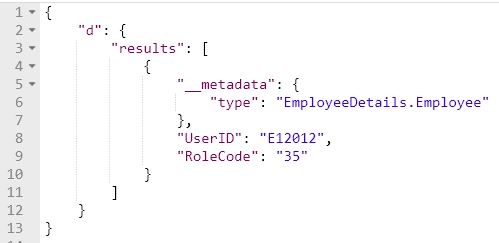

In [ ]:
# serialization using json module
# list
import json

L = [1,2,3,4]

with open('demo.json','w') as f:
  json.dump(L,f)


In [ ]:
# dict
d = {
    'name':'Inam',
     'age':20,
     'gender':'Male'
}

with open('demo.json','w') as f:
  json.dump(d,f,indent=4)

In [ ]:
# deserialization
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

In [ ]:
# serialize and deserialize tuple
import json

t = (1,2,3,4,5)

with open('demo.json','w') as f:
  json.dump(t,f)

In [ ]:
# serialize and deserialize a nested dict

d = {
    'student':'Inam',
     'marks':[23,14,34,45,56]
}

with open('demo.json','w') as f:
  json.dump(d,f,indent=4)

### **2.1** Serializing and Deserializing custom objects

In [ ]:
class Person:

  def __init__(self,fname,lname,age,gender):
    self.fname = fname
    self.lname = lname
    self.age = age
    self.gender = gender

# format to printed in
# -> Inam age -> 20 gender -> Male

In [ ]:
person = Person('Inam','Ul Hassan',20,'Male')

In [ ]:
# As a string
import json

def show_object(person):
  if isinstance(person,Person):
    return "{} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object)

In [ ]:
# As a dict
import json

def show_object(person):
  if isinstance(person,Person):
    return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object,indent=4)

In [ ]:
# deserializing
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

### **2.2** Pickling
`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [ ]:
class Person:

  def __init__(self,name,age):
    self.name = name
    self.age = age

  def display_info(self):
    print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [ ]:
p = Person('Inam',20)


In [ ]:
# pickle dump
import pickle
with open('person.pkl','wb') as f:
  pickle.dump(p,f)

In [ ]:
# pickle load
import pickle
with open('person.pkl','rb') as f:
  p = pickle.load(f)

p.display_info()

### **2.3** Pickle Vs Json

- Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.

### Tasks of File Handling + Serialization & Deserialization

#### `Q-1:`
#### Write a function `get_final_line(filename)`, which takes filename as input and return final line of the file.

Note: You can choose any file of your choice.

In [ ]:
def get_final_line(filename):
    final_line = ''
    for current_line in open(filename, 'r'):
        final_line = current_line
    return final_line

get_final_line("sample.txt")

#### `Q-2:`
#### Read through a text file, line by line. Use a dict to keep track of how many times each vowel (a, e, i, o, and u) appears in the file. Print the resulting tabulation -- dictionary.

In [ ]:
def vowelCount(filename):
  vowels = ['a','e','i','o','u']
  d = {i:0 for i in vowels}
  for current_line in open(filename, 'r'):
    for char in current_line:
      if char.lower() in vowels:
        d[char.lower()] += 1
  return d

vowel_count = vowelCount("sample.txt")
print(vowel_count)

#### `Q-3:`
#### Create a text file (using an editor, not necessarily Python) containing two tab separated columns, with each column containing a number. Then use Python to read through the file you’ve created. For each line, multiply each first number by the second and include it in the file in third column. In last add a line Total, by summing the value of third column



Input File example: That you need to create
```
1   2
3   4
5   6
7   8
9   10

```

Output File Example:
```
1   2   2
3   4   12
5   6   30
7   8   56
9   10  90
Total   190
```


In [ ]:
file_name = "test-2.txt"
f = open(file_name, "w")
for i in range(1, 11, 2):
    line = '{}\t{}\n'.format(i, i+1)
    f.writelines(line)
f.close()

with open(file_name, 'r') as f:
    lines = f.read().splitlines()

total = 0
with open(file_name, 'w') as f:
    for line in lines:
        a,b = line.split(sep="\t")
        res = int(a) * int(b)
        total+= res
        f.write("{}\t{}\t{}\n".format(a,b, res))
    f.write("Total\t"+str(total))

#### `Q-4:`
#### Create line wise reverse of a file
Write a function which takes two arguments: the names of the input file (to be read from) and the output file (which will be created).

For example, if a file looks like
 ```
abc def
ghi jkl
```
then the output file will be
```
fed cba
lkj ihg
```
**Notice**: The newline remains at the end of the string, while the rest of the characters are all reversed.

In [ ]:
input_file = "sample.txt"
output_file = "sample_reversed.txt"

def reverse_lines(infilename, outfilename):
    with open(infilename, 'r') as infile, open(outfilename, "w") as outfile:
        for one_line in infile:
            outfile.write(one_line.rstrip()[::-1]+"\n")
reverse_lines(input_file, output_file)

#### `Q-5:`
Create a Serialized dict of frequency of words in the file. And from given list of words, using serialized dict show word count.

* List of word will be given



Given String

```
strings = """Alice was beginning to get very tired of sitting by her sister
            on the bank, and of having nothing to do:  once or twice she had
            peeped into the book her sister was reading, but it had no
            pictures or conversations in it, `and what is the use of a book,'
            thought Alice `without pictures or conversation?'

            So she was considering in her own mind (as well as she could,
            for the hot day made her feel very sleepy and stupid), whether
            the pleasure of making a daisy-chain would be worth the trouble
            of getting up and picking the daisies, when suddenly a White
            Rabbit with pink eyes ran close by her.

            There was nothing so VERY remarkable in that; nor did Alice
            think it so VERY much out of the way to hear the Rabbit say to
            itself, `Oh dear!  Oh dear!  I shall be late!'  (when she thought
            it over afterwards, it occurred to her that she ought to have
            wondered at this, but at the time it all seemed quite natural);
            but when the Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT-
            POCKET, and looked at it, and then hurried on, Alice started to
            her feet, for it flashed across her mind that she had never
            before seen a rabbit with either a waistcoat-pocket, or a watch to
            take out of it, and burning with curiosity, she ran across the
            field after it, and fortunately was just in time to see it pop
            down a large rabbit-hole under the hedge."""

word_list = ['alice', 'wonder', 'natural']
```

In [ ]:
strings = """Alice was beginning to get very tired of sitting by her sister
            on the bank, and of having nothing to do:  once or twice she had
            peeped into the book her sister was reading, but it had no
            pictures or conversations in it, `and what is the use of a book,'
            thought Alice `without pictures or conversation?'

            So she was considering in her own mind (as well as she could,
            for the hot day made her feel very sleepy and stupid), whether
            the pleasure of making a daisy-chain would be worth the trouble
            of getting up and picking the daisies, when suddenly a White
            Rabbit with pink eyes ran close by her.

            There was nothing so VERY remarkable in that; nor did Alice
            think it so VERY much out of the way to hear the Rabbit say to
            itself, `Oh dear!  Oh dear!  I shall be late!'  (when she thought
            it over afterwards, it occurred to her that she ought to have
            wondered at this, but at the time it all seemed quite natural);
            but when the Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT-
            POCKET, and looked at it, and then hurried on, Alice started to
            her feet, for it flashed across her mind that she had never
            before seen a rabbit with either a waistcoat-pocket, or a watch to
            take out of it, and burning with curiosity, she ran across the
            field after it, and fortunately was just in time to see it pop
            down a large rabbit-hole under the hedge."""

word_list = ['alice', 'wonder', 'natural']


word_count_dict=dict()
for word in strings.lower().split(' '):
    try:
        word_count_dict[word] += 1
    except:
        word_count_dict[word] = 1
import pickle as pkl

pkl.dump(word_count_dict, open("word_count_dict.pkl", "wb"))

word_count = pkl.load(open("word_count_dict.pkl", "rb"))
for s in word_list:
    try:
        print(s, word_count[s])
    except:
        print(s, 0)

#### **`Q-6:`**
#### Given a string calculate length of the string using recursion.

**Example 1:**

Input:
```bash
"abcd"
```

Output:

```bash
4
```

**Example 2:**

Input:
```bash
DataScience
```

Output:

```bash
11
```


In [ ]:
string  = 'DataScience'

def string_length(s):
    if s == "":
        return 0
    else:
        return 1 + string_length(s[1:])
string_length(string)

#### **`Q-7:`**
#### Write a function that accepts two numbers and returns their greatest common divisior. Without using any loop

def gcd(int, int) => int

```
gcd(16,24) will give 8
```

In [ ]:
def gcd(a, b):
    if a == b:
        return a
    elif a>b:
        return gcd(a-b, b)
    else:
        return gcd(b-a, a)
gcd(16, 24)

#### `Q-8:`
#### Run-Length Encoding

Run-length encoding is a simple data compression technique that can be effective when repeated values occur at adjacent positions within a list. Compression is achieved by replacing groups of repeated values with one copy of the value, followed by the number of times that the value should be repeated. For example, the list
```
["A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "B", "B", "B", "B", "A", "A", "A", "A", "A", "A", "B"]
```
would be compressed as `["A", 12, "B", 4, "A", 6, "B", 1]`.

Write a recursive function that implements the run-length compression technique
described above. Your function will take a list or a string as its only parameter. It should return the run-length compressed list as its only result. Include a main program that reads a string from the user, compresses it, and displays the run-length encoded result.

In [ ]:
string = "aabbbcdabcddffgah"

def runEncode(s):
    if len(s) == 0:
        return []
    else:
        index = 1
        while index < len(s) and s[index] == s[index-1]:
            index += 1
        compressed = [s[0], index]

        return compressed + runEncode(s[index:])

print(runEncode(string))

#### `Q-9:`
#### Write a recursive function to convert a decimal to binary

In [ ]:
decimal = 150

def decToBin(decimal):
    if decimal == 0:
        return "0"
    else:
        return decToBin(decimal >> 1) + str(decimal & 1)
decToBin(decimal)

## **3.** Exception Handling



There are 2 stages where error may happen in a program

- During compilation -> Syntax Error
- During execution -> Exceptions

### **3.1** Types Of Errors

#### **3.1.1** Syntax Error

- Something in the program is not written according to the program grammar.
- Error is raised by the interpreter/compiler
- You can solve it by rectifying the program


In [ ]:
# Examples of syntax error
print 'hello world'

##### **3.1.1.1** Other examples of syntax error

- Leaving symbols like colon,brackets
- Misspelling a keyword
- Incorrect indentation
- empty if/else/loops/class/functions

In [ ]:
# SyntaxError: invalid syntax
a = 5
if a==3
  print('hello')

In [ ]:
# SyntaxError: invalid syntax
a = 5
iff a==3:
  print('hello')

#### **3.1.2** Identation Error

In [ ]:
# IndentationError: expected an indented block
a = 5
if a==3:
print('hello')

#### **3.1.3** Index Error

In [ ]:
# The IndexError is thrown when trying to access an item at an invalid index.
L = [1,2,3]
L[100]

#### **3.1.4** Module Not Found Error

In [ ]:
# The ModuleNotFoundError is thrown when a module could not be found.
import mathi
mathi.floor(5.3)

#### **3.1.5** Key Error

In [ ]:
# The KeyError is thrown when a key is not found
d = {'name':'Inam'}
d['age']

#### **3.1.6** Type Error

In [ ]:
# The TypeError is thrown when an operation or function is applied to an object of an inappropriate type.
1 + 'a'

#### **3.1.7**  Value Error

In [ ]:
# The ValueError is thrown when a function's argument is of an inappropriate type.
int('a')

#### **3.1.8** Name Error

In [ ]:
# The NameError is thrown when an object could not be found.
print(k)

#### **3.1.9** Atribute Error

In [ ]:
L = [1,2,3]
L.upper()

# Stacktrace

### **3.2** Exceptions

If things go wrong during the execution of the program(runtime). It generally happens when something unforeseen has happened.

- Exceptions are raised by python runtime
- You have to takle is on the fly

#### **Examples**

- Memory overflow
- Divide by 0 -> logical error
- Database error

In [ ]:
# Why is it important to handle exceptions
# how to handle exceptions
# -> Try except block

In [ ]:
# let's create a file
with open('sample.txt','w') as f:
  f.write('hello world')

In [ ]:
# try catch demo
try:
  with open('sample1.txt','r') as f:
    print(f.read())
except:
  print('Sorry file not found')

In [ ]:
# catching specific exception
try:
  m=5
  f = open('sample1.txt','r')
  print(f.read())
  print(m)
  print(5/2)
  L = [1,2,3]
  L[100]
except FileNotFoundError:
  print('File not found')
except NameError:
  print('Variable not defined')
except ZeroDivisionError:
  print("Can't divide by 0")
except Exception as e:
  print(e)

In [ ]:
# else
try:
  f = open('sample1.txt','r')
except FileNotFoundError:
  print('File not found')
except Exception:
  print('There is some error')
else:
  print(f.read())



In [ ]:
# finally
# else
try:
  f = open('sample1.txt','r')
except FileNotFoundError:
  print('File not found')
except Exception:
  print('There is some error')
else:
  print(f.read())
finally:
  print('This should be print')

In [ ]:
# raise Exception
# In Python programming, exceptions are raised when errors occur at runtime.
# We can also manually raise exceptions using the raise keyword.

# We can optionally pass values to the exception to clarify why that exception was raised

In [ ]:
raise ZeroDivisionError('Just Try')
# Java
# try -> try
# except -> catch
# raise -> throw

In [ ]:
class Bank:

  def __init__(self,balance):
    self.balance = balance

  def withdraw(self,amount):
    if amount < 0:
      raise Exception('Amount cannot be -ve')
    if self.balance < amount:
      raise Exception('Invalid Balance')
    self.balance = self.balance - amount

obj = Bank(10000)
try:
  obj.withdraw(15000)
except Exception as e:
  print(e)
else:
  print(obj.balance)

In [ ]:
class MyException(Exception):
  def __init__(self,message):
    print(message)

class Bank:

  def __init__(self,balance):
    self.balance = balance

  def withdraw(self,amount):
    if amount < 0:
      raise MyException('Amount cannot be -ve')
    if self.balance < amount:
      raise MyException('Invalid balance')
    self.balance = self.balance - amount

obj = Bank(10000)
try:
  obj.withdraw(15000)
except MyException as e:
  pass
else:
  print(obj.balance)

In [ ]:
# simple example
class SecurityError(Exception):

  def __init__(self,message):
    print(message)

  def logout(self):
    print('Logout')

class Google:

  def __init__(self,name,email,password,device):
    self.name = name
    self.email = email
    self.password = password
    self.device = device

  def login(self,email,password,device):
    if device != self.device:
      raise SecurityError('Security Error Identify....!')
    if email == self.email and password == self.password:
      print('Welcome')
    else:
      print('Login Error')



obj = Google('Inam','inam@gmail.com','1234','Android')

try:
  obj.login('inam@gmail.com','1234','Windows')
except SecurityError as e:
  e.logout()
else:
  print(obj.name)
finally:
  print('Database connection closed')

### **3.3** Tasks Of Exception Handling

#### `Q-1`
You are given a function definition. There might be several issues on execution of this function. You are asked to do exception handling for diffrent errors that this function goes in to `without altering this function`. And print error text.



Function parameters `l -> list, s -> could be anything`

```
def function(l: list, s, **args):
    last_element = l[-1]
    
    l[int(s)]=10
    any_element = l[int(s)+10]
    l[s]=10
    
    res = sum(l)
    
    p = args['p']
    # print(p)
    return res/last_element * p + any_element

```
Check for different function calls:-

```
function([1,2,1], 12)
function([1,2,1]*9, '1-2')
function([1,'2',1]*9, 12)
function([1,'2',1]*9, 12)
function([1,2,0]*9, 12  )
function([1,2,1]*9, 12, p=None)
function([1,2,0]*9, 12, p=10)
```

In [ ]:
# Write code here
def function(l: list, s, **args):
    last_element = l[-1]

    l[int(s)]=10
    any_element = l[int(s)+10]
    l[s]=10

    res = sum(l)

    p = args['p']
    # print(p)
    return res/last_element * p + any_element
try:
    res = function([1,2,1]*9, 12, p=10)
except IndexError as i:
    print(type(i))
    print(i)
except ValueError as v:
    print(type(v))
    print(v)
except TypeError as t:
    print(type(t))
    print(t)
except KeyError as k:
    print(type(k))
    print(k)
except ZeroDivisionError as z:
    print(type(z))
    print(z)
else:
    print("Result:", res)
finally:
    print("Thank you")

#### `Q-2`
### You are given a code snippet. There might be several issues on execution of this code. You are asked to do exception handling for diffrent errors, condition is what ever happens we need to execute last line printing correct result of `sum of elements`.

List have elemnts as any no of  `key-pair dict with key as list index and value as any integer`, `integers` and `numeric-strings`. There is always only one element in the dict.


```
l = [{0:2},2,3,4,'5', {5:10}]
# For calculating sum of above list
s=0
for i in range(len(l)):
    #You can Edit code from here
    s += l[i].get(i)
    s += l[i]
    s += int(l[i])


print(s)
```

In [ ]:
l = [{0:2},2,3,4,'5', {5:10}]
# For calculating sum of above list
s=0
for i in range(len(l)):
    try:
        s += l[i]
    except TypeError:
        try:
            s += l[i].get(i)
        except AttributeError:
            s += int(l[i])
print(s)

#### `Q-3`
### File Handling with Exception handling

Write a program that opens a text file and write data to it as "Hello, Good Morning!!!". Handle exceptions that can be generated during the I/O operations. Do not show the success message on the main exception handling block (write inside the else block).

In [ ]:
try:
    with open("text_file.txt", "w") as f:
        f.write("Hello, Good Morning!!!")
except IOError:
    print("Error working with file...")
else:
    print("File written successfully")

#### `Q-4`
### Number game program.

Write a number game program. Ask the user to enter a number. If the number is greater than number to be guessed, raise a **ValueTooLarge** exception. If the value is smaller the number to be guessed the, raise a **ValueTooSmall** exception and prompt the user to enter again. Quit the program only when the user enters the correct number. Also raise **GuessError** if user guess a number less than 1.

In [ ]:
import random

class ValueTooLarge(Exception):
    def display(self):
        print("Input value is too large")

class ValueTooSmall(Exception):
    def display(self):
        print("Input value is too small")

class GuessError(Exception):
    def display(self):
        print("Guess the number between 1 and 100")

num = random.randint(1, 100)
while 1:
    try:
        guess = int(input("Enter a number:"))

        if guess < 1:
            raise GuessError

        if guess == num:
            print("Great You succeeded...")
            break
        if guess < num:
            raise ValueTooSmall
        if guess > num:
            raise ValueTooLarge
    except ValueTooSmall as s:
        s.display()
    except ValueTooLarge as l:
        l.display()
    except GuessError as g:
        g.display()


#### `Q-5`
### Cast vote

Write a program that validate name and age as entered by the user to determine whether the person can cast vote or not. To handle the age, create **InvalidAge** exception and for name, create **InvalidName** exception. The name will be invalid when the string will be empty or name has only one word.

Example 1:

Input:

```bash
Enter the name:               goransh singh
Enter the age: 25
```

Output:

```bash
Goransh Singh  Congratulation !!! You can vote.
```

In [ ]:
class InvalidAge(Exception):
    def display(self):
        print("Sorry!! Age cannot be below 18. Please come after that")

class InvalidName(Exception):
    def display(self):
        print("Please enter a valid name...")

try:
    user_input = input  # Reassigning built-in input to user_input
    name = user_input("Enter your name: ").strip()
    if len(name) == 0 or len(name.split()) < 2:
        raise InvalidName()

    age = user_input("Enter your age: ").strip()

    if not age.isdigit():
        raise ValueError("Invalid input! Age must be a number.")

    age = int(age)

    if age < 18:
        raise InvalidAge()

except InvalidName as i:
    i.display()
except InvalidAge as a:
    a.display()
except ValueError as v:
    print(v)
else:
    print("Your vote is accepted successfully")
finally:
    print("Thank You")


#### `Q-6`
### Write a python function which infinitely prints natural numbers in a single line. Raise the **StopIteration** exception after displaying first 20 numnbers to exit from the program.

In [ ]:
def display(n):
    i=0
    while True:
        try:
            n+=1
            i+=1
            if i==21:
                raise StopIteration
        except StopIteration:
            break
        else:
            print(n, end =' ')
display(100)

## **4.** What are Modules?

- **Code libraries** in Python.
- **Contain functions** for use.

*Examples:*
- **Math**: Math ops
- **Random**: Random numbers
- **os**: OS interaction
- **time**: Time tasks

In [ ]:
!pip list

### **4.1** Keyword Modules

In [ ]:
# keyword module
import keyword
print(keyword.kwlist)  # Reserved keywords in Python


### **4.2** Math's Modules

In [ ]:
# include <stdio.h>
import math

In [ ]:
math.pi

In [ ]:
math.e

In [ ]:
math.factorial(5)

In [ ]:
math.ceil(6.3)

In [ ]:
math.floor(6.9)

### **4.3** Random Modules

In [ ]:
import random

In [ ]:
random.randint(1, 100)

In [ ]:
a = [1, 2, 3, 4, 5]
random.shuffle(a)
a

### **4.4** Time Modules

In [ ]:
import time

In [ ]:
time.time() # Current time (seconds)

In [ ]:
time.ctime() # Current time (string)

In [ ]:
print("Hello")
time.sleep(5) # Delay for 5 seconds
print("World")

### **4.5** Datetime Modules

In [ ]:
import datetime
print(datetime.datetime.now()) # Current date/time

### **4.6** OS Modules

In [ ]:
import os

In [ ]:
os.getcwd() # Current working dir

In [ ]:
os.listdir() # Files in dir

## **5.** Namespaces

A namespace is a space that holds names(identifiers).Programmatically speaking, namespaces are dictionary of identifiers(keys) and their objects(values)

There are 4 types of namespaces:
- Builtin Namespace
- Global Namespace
- Enclosing Namespace
- Local Namespace

### **5.1** Scope and LEGB Rule

A scope is a textual region of a Python program where a namespace is directly accessible.

The interpreter searches for a name from the inside out, looking in the local, enclosing, global, and finally the built-in scope. If the interpreter doesn’t find the name in any of these locations, then Python raises a NameError exception.

### **5.2** Local & Global With Different Senerios

In [ ]:
# local and global

# global var
a = 2

def temp():
  # local var
  b = 3
  print(b)

temp()
print(a)

In [ ]:
# local and global -> same name

#global var
a = 2

def temp():
  # local var
  a = 3
  print(b)

temp()
print(a)

In [ ]:
# local and global -> local does not have but global has
a = 2

def temp():
  # local var
  print(a)

temp()
print(a)


In [ ]:
# local and global -> editing global
a = 2

def temp():
  # local var
  a += 1
  print(a)

temp()
print(a)

In [ ]:
# local and global -> editing global
a = 2

def temp():
  # local var
  global a
  a += 1
  print(a)

temp()
print(a)

In [ ]:
a = 2

def temp():
  # local var
  global a
  a += 1
  print(a)

temp()
print(a)

In [ ]:
# local and global -> global created inside local
def temp():
  # local var
  global a
  a = 1
  print(a)

temp()
print(a)

In [ ]:
# local and global -> function parameter is local
def temp(z):
  # local var
  print(z)

b = 5
temp(5)
print(b)

### **5.3** Built-in Scopes

In [ ]:
# built-in scope
import builtins
print(dir(builtins))

In [ ]:
# renaming built-ins
L = [1,2,3]
print(max(L))
def max():
  print('hello')

print(max(L))

### **5.4** Enclosing Scope

In [ ]:
# Enclosing scope
def outer():
  def inner():
    print('inner function')
  inner()
  print('outer function')


outer()
print('main program')

### **5.5** Non-local Keywords

In [ ]:
# nonlocal keyword
def outer():
  a = 1
  def inner():
    nonlocal a
    a += 1
    print('inner',a)
  inner()
  print('outer',a)


outer()
print('main program')

## **6.** Decorators

A decorator in python is a function that receives another function as input and adds some functionality(decoration) to and it and returns it.

This can happen only because python functions are 1st class citizens.

There are 2 types of decorators available in python
- `Built in decorators` like `@staticmethod`, `@classmethod`, `@abstractmethod` and `@property` etc
- `User defined decorators` that we programmers can create according to our needs

In [ ]:
# Python are 1st class function

def modify(func,num):
  return func(num)

def square(num):
  return num**2

modify(square,2)

In [ ]:
# simple example

def my_decorator(func):
  def wrapper():
    print('***********************')
    func()
    print('***********************')
  return wrapper

def hello():
  print('Hello')

def display():
  print('Hello Inam')

a = my_decorator(hello)
a()

b = my_decorator(display)
b()

In [ ]:
# more functions
# how this works -> closure?
# python tutor

In [ ]:
# Better syntax?
# simple example

def my_decorator(func):
  def wrapper():
    print('***********************')
    func()
    print('***********************')
  return wrapper

@my_decorator
def hello():
  print('hello')

hello()

In [ ]:
# anything meaningful?
import time

def timer(func):
  def wrapper(*args):
    start = time.time()
    func(*args)
    print('Time taken by',func.__name__,time.time()-start,'secs')
  return wrapper

@timer
def hello():
  print('Hello Wolrd')
  time.sleep(2)

@timer
def square(num):
  time.sleep(1)
  print(num**2)

@timer
def power(a,b):
  print(a**b)

hello()
square(2)
power(2,3)


In [ ]:
# A big problem

In [ ]:
# One last example -> decorators with arguments

In [ ]:
@checkdt(int)
def square(num):
  print(num**2)

In [ ]:
def sanity_check(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(*args) == data_type:
        func(*args)
      else:
        raise TypeError('This data-type will not work....')
    return inner_wrapper
  return outer_wrapper

@sanity_check(int)
def square(num):
  print(num**2)

@sanity_check(str)
def greet(name):
  print('Hello',name)

square(2)
greet('Inam')

## **7.** Iterators

### **7.1** What is an Iteration

Iteration is a general term for taking each item of something, one after another. Any time you use a loop, explicit or implicit, to go over a group of items, that is iteration.

In [ ]:
# Example
num = [1,2,3]

for i in num:
    print(i)

### **7.2**  What is Iterator

An Iterator is an object that allows the programmer to traverse through a sequence of data without having to store the entire data in the memory

In [ ]:
# Example
L = [x for x in range(1,10000)]

#for i in L:
    #print(i*2)

import sys

print(sys.getsizeof(L)/64)

x = range(1,10000000000)

#for i in x:
    #print(i*2)

print(sys.getsizeof(x)/64)



### **7.3**  What is Iterable
Iterable is an object, which one can iterate over

 It generates an Iterator when passed to iter() method.

In [ ]:
# Example

L = [1,2,3]
type(L)


# L is an iterable
type(iter(L))

# iter(L) --> iterator

### **7.4** Point to remember

- Every **Iterator** is also and **Iterable**
- Not all **Iterables** are **Iterators**

### **7.5**  Trick
- Every Iterable has an **iter function**
- Every Iterator has both **iter function** as well as a **next function**

In [ ]:
a = 2
a

#for i in a:
    #print(i)

dir(a)

In [ ]:
T = {1:2,3:4}
dir(T)

In [ ]:
L = [1,2,3]

# L is not an iterator
iter_L = iter(L)

# iter_L is an iterator

### **7.6**  Understanding how for loop works

In [ ]:
num = [1,2,3]

for i in num:
    print(i)

In [ ]:
num = [1,2,3]

# fetch the iterator
iter_num = iter(num)

# step2 --> next
next(iter_num)
next(iter_num)
next(iter_num)

### **7.7**  Making our own for loop

In [ ]:
def mera_khudka_for_loop(iterable):

    iterator = iter(iterable)

    while True:

        try:
            print(next(iterator))
        except StopIteration:
            break

In [ ]:
a = [1,2,3]
b = range(1,11)
c = (1,2,3)
d = {1,2,3}
e = {0:1,1:1}

mera_khudka_for_loop(e)

### **7.8**  A confusing point

In [ ]:
num = [1,2,3]
iter_obj = iter(num)

print(id(iter_obj),'Address of iterator 1')

iter_obj2 = iter(iter_obj)
print(id(iter_obj2),'Address of iterator 2')

### **7.9** Let's create our own range() function

In [ ]:
class mera_range:
    def __init__(self, start, end):
        self.start = start
        self.end = end

    def __iter__(self):
        return mera_range_iterator(self)  # Returns an iterator

class mera_range_iterator:
    def __init__(self, iterable_obj):
        self.iterable = iterable_obj  # Stores the mera_range object

    def __iter__(self):
        return self  # Iterator returns itself

    def __next__(self):
        if self.iterable.start >= self.iterable.end:
            raise StopIteration  # Stop iteration when start reaches end

        current = self.iterable.start  # Store the current number
        self.iterable.start += 1  # Increment start
        return current  # Return current value

# Creating an iterable object
x = mera_range(1, 4)
iterator = iter(x)  # Getting the iterator

print(next(iterator))
print(next(iterator))
print(next(iterator))
print(next(iterator))  # This will raise StopIteration


## **8.** Generators in Python

### **8.1** What is a Generator

Python generators are a simple way of creating iterators.

In [ ]:
# iterable
class mera_range:

    def __init__(self,start,end):
        self.start = start
        self.end = end

    def __iter__(self):
        return mera_iterator(self)


# iterator
class mera_iterator:

    def __init__(self,iterable_obj):
        self.iterable = iterable_obj

    def __iter__(self):
        return self

    def __next__(self):

        if self.iterable.start >= self.iterable.end:
            raise StopIteration

        current = self.iterable.start
        self.iterable.start+=1
        return current

### **8.2** THE WHY ?

In [ ]:
L = [x for x in range(100000)]

#for i in L:
    #print(i**2)

import sys
sys.getsizeof(L)

x = range(10000000)

#for i in x:
    #print(i**2)
sys.getsizeof(x)

### **8.3** Simple Example

In [ ]:
def gen_demo():

    yield "first statement"
    yield "second statement"
    yield "third statement"

In [ ]:
gen = gen_demo()

for i in gen:
    print(i)

Python Tutor Demo (Yeild VS Return)

### **8.4** Example 2

In [ ]:
def square(num):
    for i in range(1,num+1):
        yield i**2

In [ ]:
gen = square(10)

print(next(gen))
print(next(gen))
print(next(gen))

for i in gen:
    print(i)

### **8.5** Range Function using Generator

In [ ]:
def mera_range(start,end):

    for i in range(start,end):
        yield i

In [ ]:
for i in mera_range(15,26):
    print(i)

### **8.6** Generator Expression

In [ ]:
# list comprehension
L = [i**2 for i in range(1,101)]

In [ ]:
gen = (i**2 for i in range(1,101))

for i in gen:
    print(i)

### **8.7** Practical Example

In [ ]:
import os
import cv2

def image_data_reader(folder_path):

    for file in os.listdir(folder_path):
        f_array = cv2.imread(os.path.join(folder_path,file))
        yield f_array


In [ ]:
gen = image_data_reader('C:/Users/91842/emotion-detector/train/Sad')

next(gen)
next(gen)

next(gen)
next(gen)

### **8.8** Benefits of using a Generatoe

#### **8.8.1** Ease of Implementation

In [ ]:
class mera_range:

    def __init__(self,start,end):
        self.start = start
        self.end = end

    def __iter__(self):
        return mera_iterator(self)

In [ ]:
# iterator
class mera_iterator:

    def __init__(self,iterable_obj):
        self.iterable = iterable_obj

    def __iter__(self):
        return self

    def __next__(self):

        if self.iterable.start >= self.iterable.end:
            raise StopIteration

        current = self.iterable.start
        self.iterable.start+=1
        return current

In [ ]:
def mera_range(start,end):

    for i in range(start,end):
        yield i

#### **8.8.2** Memory Efficient

In [ ]:
L = [x for x in range(100000)]
gen = (x for x in range(100000))

import sys

print('Size of L in memory',sys.getsizeof(L))
print('Size of gen in memory',sys.getsizeof(gen))

#### **8.8.3** Representing Infinite Streams

In [ ]:
def all_even():
    n = 0
    while True:
        yield n
        n += 2

In [ ]:
even_num_gen = all_even()
next(even_num_gen)
next(even_num_gen)

#### **8.8.4** Chaining Generators

In [ ]:
def fibonacci_numbers(nums):
    x, y = 0, 1
    for _ in range(nums):
        x, y = y, x+y
        yield x

def square(nums):
    for num in nums:
        yield num**2

print(sum(square(fibonacci_numbers(10))))

### Tasks of Namespace & Scope

#### `Q1`
#### Write `Person` Class as given below and then display it's namespace.



```
Class Name - Person

Attributes:
name - public
state - public
city - private
age - private

Methods:
address - public
It give address of the person as "<name>, <city>, <state>"
```

In [ ]:
#Write your code here
class Person:
    def __init__(self, name, state):
        self.name = name
        self.state = state
        self.__city = None
        self.__age = None
    def set_city(self, city):
        self.__city = city
    def get_city(self):
        return self.__city
    def set_age(self, age):
        self.__age = age
    def get_age(self):
        return self.__age
    def address(self):
        return f'{self.name}, {self.__city}, {self.state}'

for i in Person.__dict__:
    print(i)

#### `Q2`
#### Write a program to show namespace of object/instance of above(Person) class.

In [ ]:
# Write your code here
p = Person("Raj", "West Bengal")
p.set_city("Kolkata")
p.set_age(40)
print("Address: ", p.address())

for i in p.__dict__:
    print(i)

#### `Q3`
#### Write a recursive program to to calculate `gcd` and print no. of function calls taken to find the solution.
```
gcd(5,10) -> result in 5 as gcd and function call 3
```

In [ ]:
#Write your code here
# O(log(min(a,b)))

counter = 0
def gcd(a,b):
    global counter
    counter += 1
    if b == 0:
        return a
    else:
        return gcd(b, a%b)
print(gcd(10, 5), counter)

### Tasks of Iterators & Generators

### `Q4` Create MyEnumerate class,
Create your own `MyEnumerate` class such that someone can use it instead of enumerate. It will need to return a `tuple` with each iteration, with the first element in the tuple being the `index` (starting with 0) and the second element being the `current element` from the underlying data structure. Trying to use `MyEnumerate` with a noniterable argument will result in an error.

```
for index, letter in MyEnumerate('abc'):
    print(f'{index} : {letter}')
```

Output:
```
0 : a
1 : b
2 : c
```

In [ ]:
#Write your code here

class MyEnumerate:
    def __init__(self, data):
        self.data = data
        self.index = 0
    def __iter__(self):
        return self
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        value = (self.index, self.data[self.index])
        self.index += 1
        return value
for index, letter in MyEnumerate('abc'):
    print(f'{index} : {letter}')

#### `Q5:` Iterate in circle
Define a class, `Circle`, that takes two arguments when defined: a sequence and a number. The idea is that the object will then return elements the defined number of times. If the number is greater than the number of elements, then the sequence  repeats as necessary. You can define an another class used as a helper (like I call `CircleIterator`).

```
c = Circle('abc', 5)
d = Circle('abc', 7)
print(list(c))
print(list(d))
```

Output
```
[a, b, c, a, b]
[a, b, c, a, b, c, a]
```

In [ ]:
#Write your code here
class Circle:
    def __init__(self, data, max_iters):
        self.data = data
        self.index = 0
        self.max_iters = max_iters

    def __iter__(self):
        return self
    def __next__(self):
        if self.index >= self.max_iters:
            raise StopIteration
        value = self.data[self.index % len(self.data)]
        self.index += 1
        return value
c = Circle('abc', 5)
d = Circle('abc', 7)
print(list(c))
print(list(d))


#### `Q6:` Generator time elapsed
Write a generator function whose argument must be iterable. With each iteration, the generator will return a two-element tuple. The first element in the tuple will be an integer indicating how many seconds have passed since the previous iteration. The tuple’s second element will be the next item from the passed argument.

Note that the timing should be relative to the previous iteration, not when the
generator was first created or invoked. Thus the timing number in the first iteration
will be 0

```
for t in elapsed_since('abcd'):
    print(t)
    time.sleep(2)
```

Output:
```
(0.0, 'a')
(2.005651817999933, 'b')
(2.0023095009998997, 'c')
(2.001949742000079, 'd')
```
Note: Your output may differ because of diffrent system has different processing configuration.

In [ ]:
#Write yor code
import time
def elapsed_since(data):
    last_time = time.perf_counter()
    for item in data:
        current_time = time.perf_counter()
        delta = current_time - last_time
        last_time = current_time
        yield (delta, item)

for t in elapsed_since('abcd'):
    print(t)
    time.sleep(2)

### Tasks of Decorators

#### `Q7`
#### Write a Python program to make a chain of function decorators (bold, italic, underline etc.) on a given function which prints "hello world"

```
def hello():
    return "hello world"
```

```
bold - wrap string with <b> tag. <b>Str</b>
italic - wrap string with <i> tag. <i>Str</i>
underline- wrap string with <u> tag. <u>Str</u>
```

In [ ]:
#Write your code here
def make_bold(func):
    def wrapped():
        return "<b>"+ func() + "</b>"
    return wrapped
def make_italic(func):
    def wrapped():
        return "<i>"+ func() + "</i>"
    return wrapped
def make_underline(func):
    def wrapped():
        return "<u>"+ func() + "</u>"
    return wrapped

@make_bold
@make_italic
@make_underline
def hello():
    return "hello world"

print(hello())

#### `Q8`
####Write a decorator called `printer` which causes any decorated function to print their return values. If the return value of a given function is `None`, printer should do nothing.



In [ ]:
#Write your code here
from functools import wraps
def printer(func):
    @wraps(func)
    def inner(*args, **kwargs):
        return_value = func(*args, **kwargs)
        if return_value is not None:
            print(return_value)
        return return_value
    return inner

@printer
def hello(string):
    return string

hello("hello")

In [ ]:
help(hello)

#### `Q9`
#### Make a decorator which calls a given function twice. You can assume the functions don't return anything important, but they may take arguments.
```
#Lets say given function
def hello(string):
    print(string)

#on calling after specified decorator is inplaced
hello('hello')
```

Output:
```
hello
hello
```

In [ ]:
#Write your cod here
def double(func):
    @wraps(func)
    def inner(*args, **kwargs):
        func(*args, **kwargs)
        func(*args, **kwargs)
    return inner
@double
def hello(string):
    print(string)

hello("hello")

#### `Q10`
#### Write a decorator which doubles the return value of any function. And test that decoratos is working correctly or not using `asert`.

```
add(2,3) -> result in 10. Without decorator it should be 5.
```

In [ ]:
# Write your code here
def double(func):
    @wraps(func)
    def inner(*args, **kwargs):
        return func(*args, **kwargs) * 2
    return inner
@double
def add_withDeco(a,b):
    return a+b

def add(a,b):
    return a+b

a=2
b=3
assert add(a,b)*2 == add_withDeco(a,b), "Values are not matching"
print("Values are matching")